<a href="https://colab.research.google.com/github/sawsenbriki/sawsenbriki/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [6]:
netflix = pd.read_csv('/content/NetflixOriginals.csv', encoding='latin-1') # or 'ISO-8859-1'

In [7]:
netflix

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [9]:
netflix.shape

(584, 6)

In [11]:
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [12]:
netflix.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [10]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [16]:
netflix.isnull().sum ()

,0
Title,0
Genre,0
Premiere,0
Runtime,0
IMDB Score,0
Language,0


In [25]:
netflix.duplicated().sum()

np.int64(0)

In [21]:
score_8 = netflix[netflix['IMDB Score'] >= 8] # Changed 'neteflix' to 'netflix'

<Axes: xlabel='IMDB Score', ylabel='Title'>

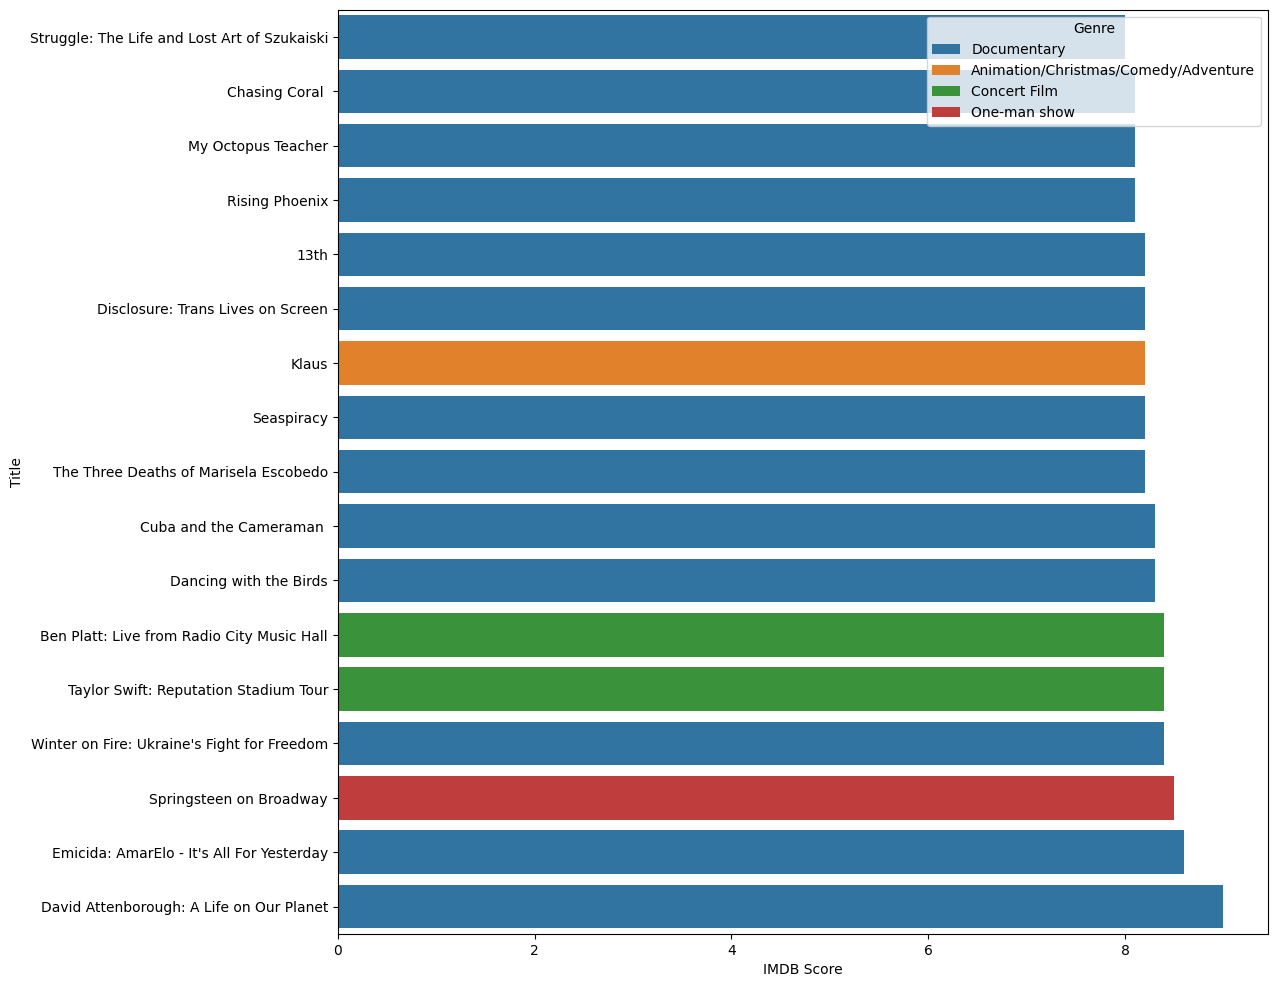

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

plt.figure(figsize=(12, 12))
sns.barplot(x='IMDB Score', y='Title', hue='Genre', data=score_8)

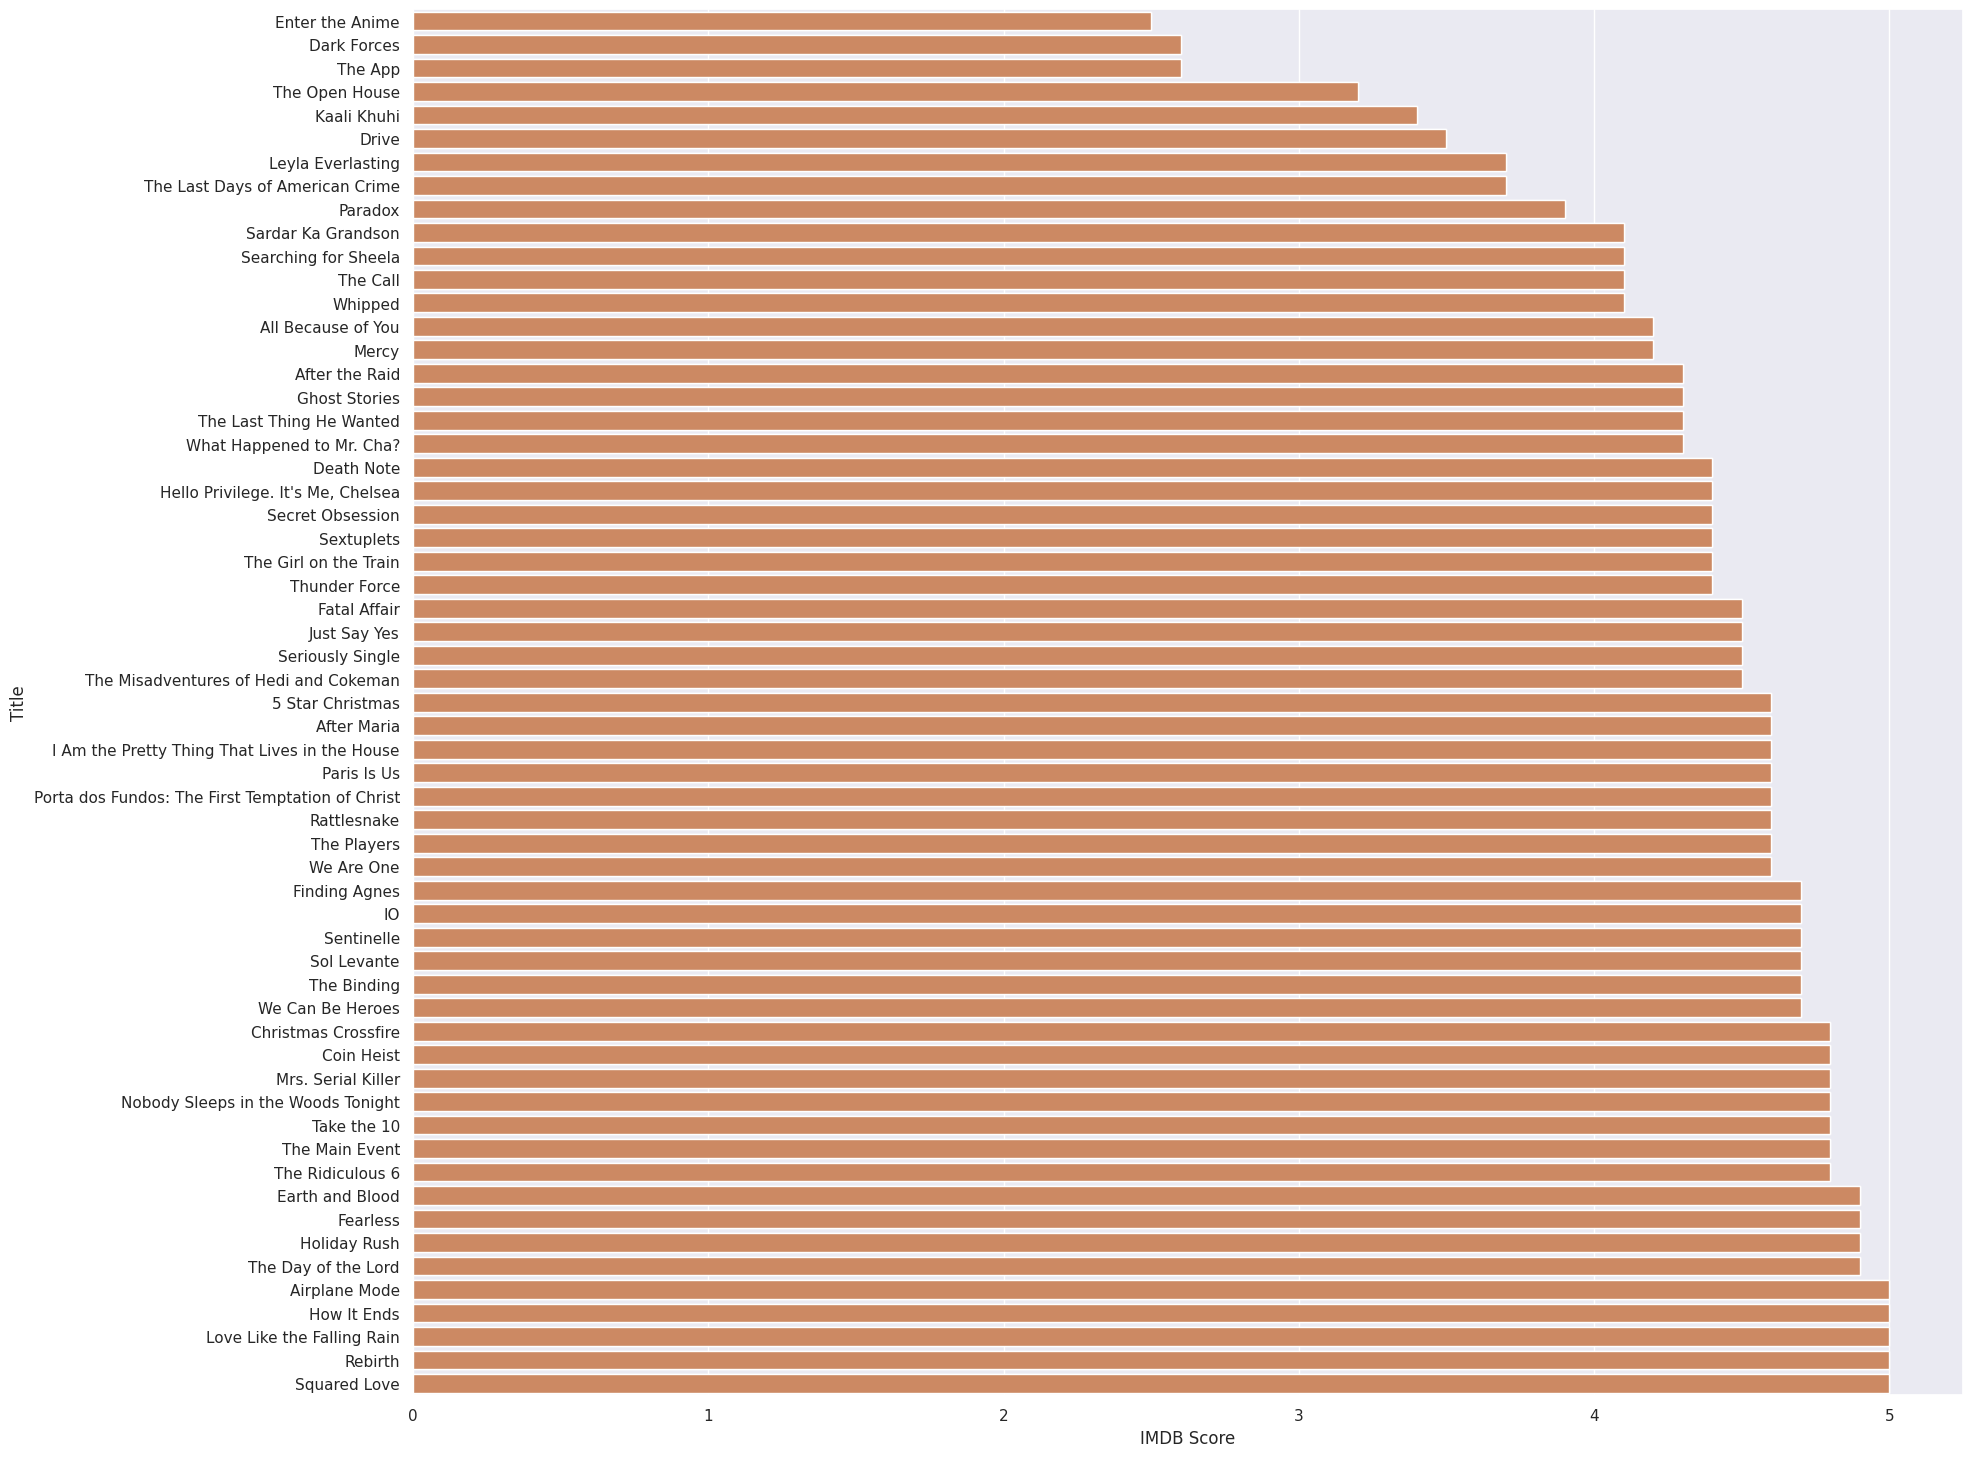

In [24]:
fig = px.bar(score_8, x='IMDB Score', y='Title', color='Genre')
fig.show()

# Above are the movies which have ratings 8 or more

sns.set(rc={'figure.figsize':(20, 18)})
score_5 = netflix[netflix['IMDB Score'] <= 5]
sns.barplot(x='IMDB Score', y='Title', data=score_5)
# Above are the movies which have ratings 8 or more

sns.set(rc={'figure.figsize':(20, 18)})
score_5 = netflix[netflix['IMDB Score'] <= 5]
sns.barplot(x='IMDB Score', y='Title', data=score_5)

fig = px.bar(score_5, x='IMDB Score', y='Title', color='Genre')
fig.show()

<Axes: xlabel='Genre', ylabel='count'>

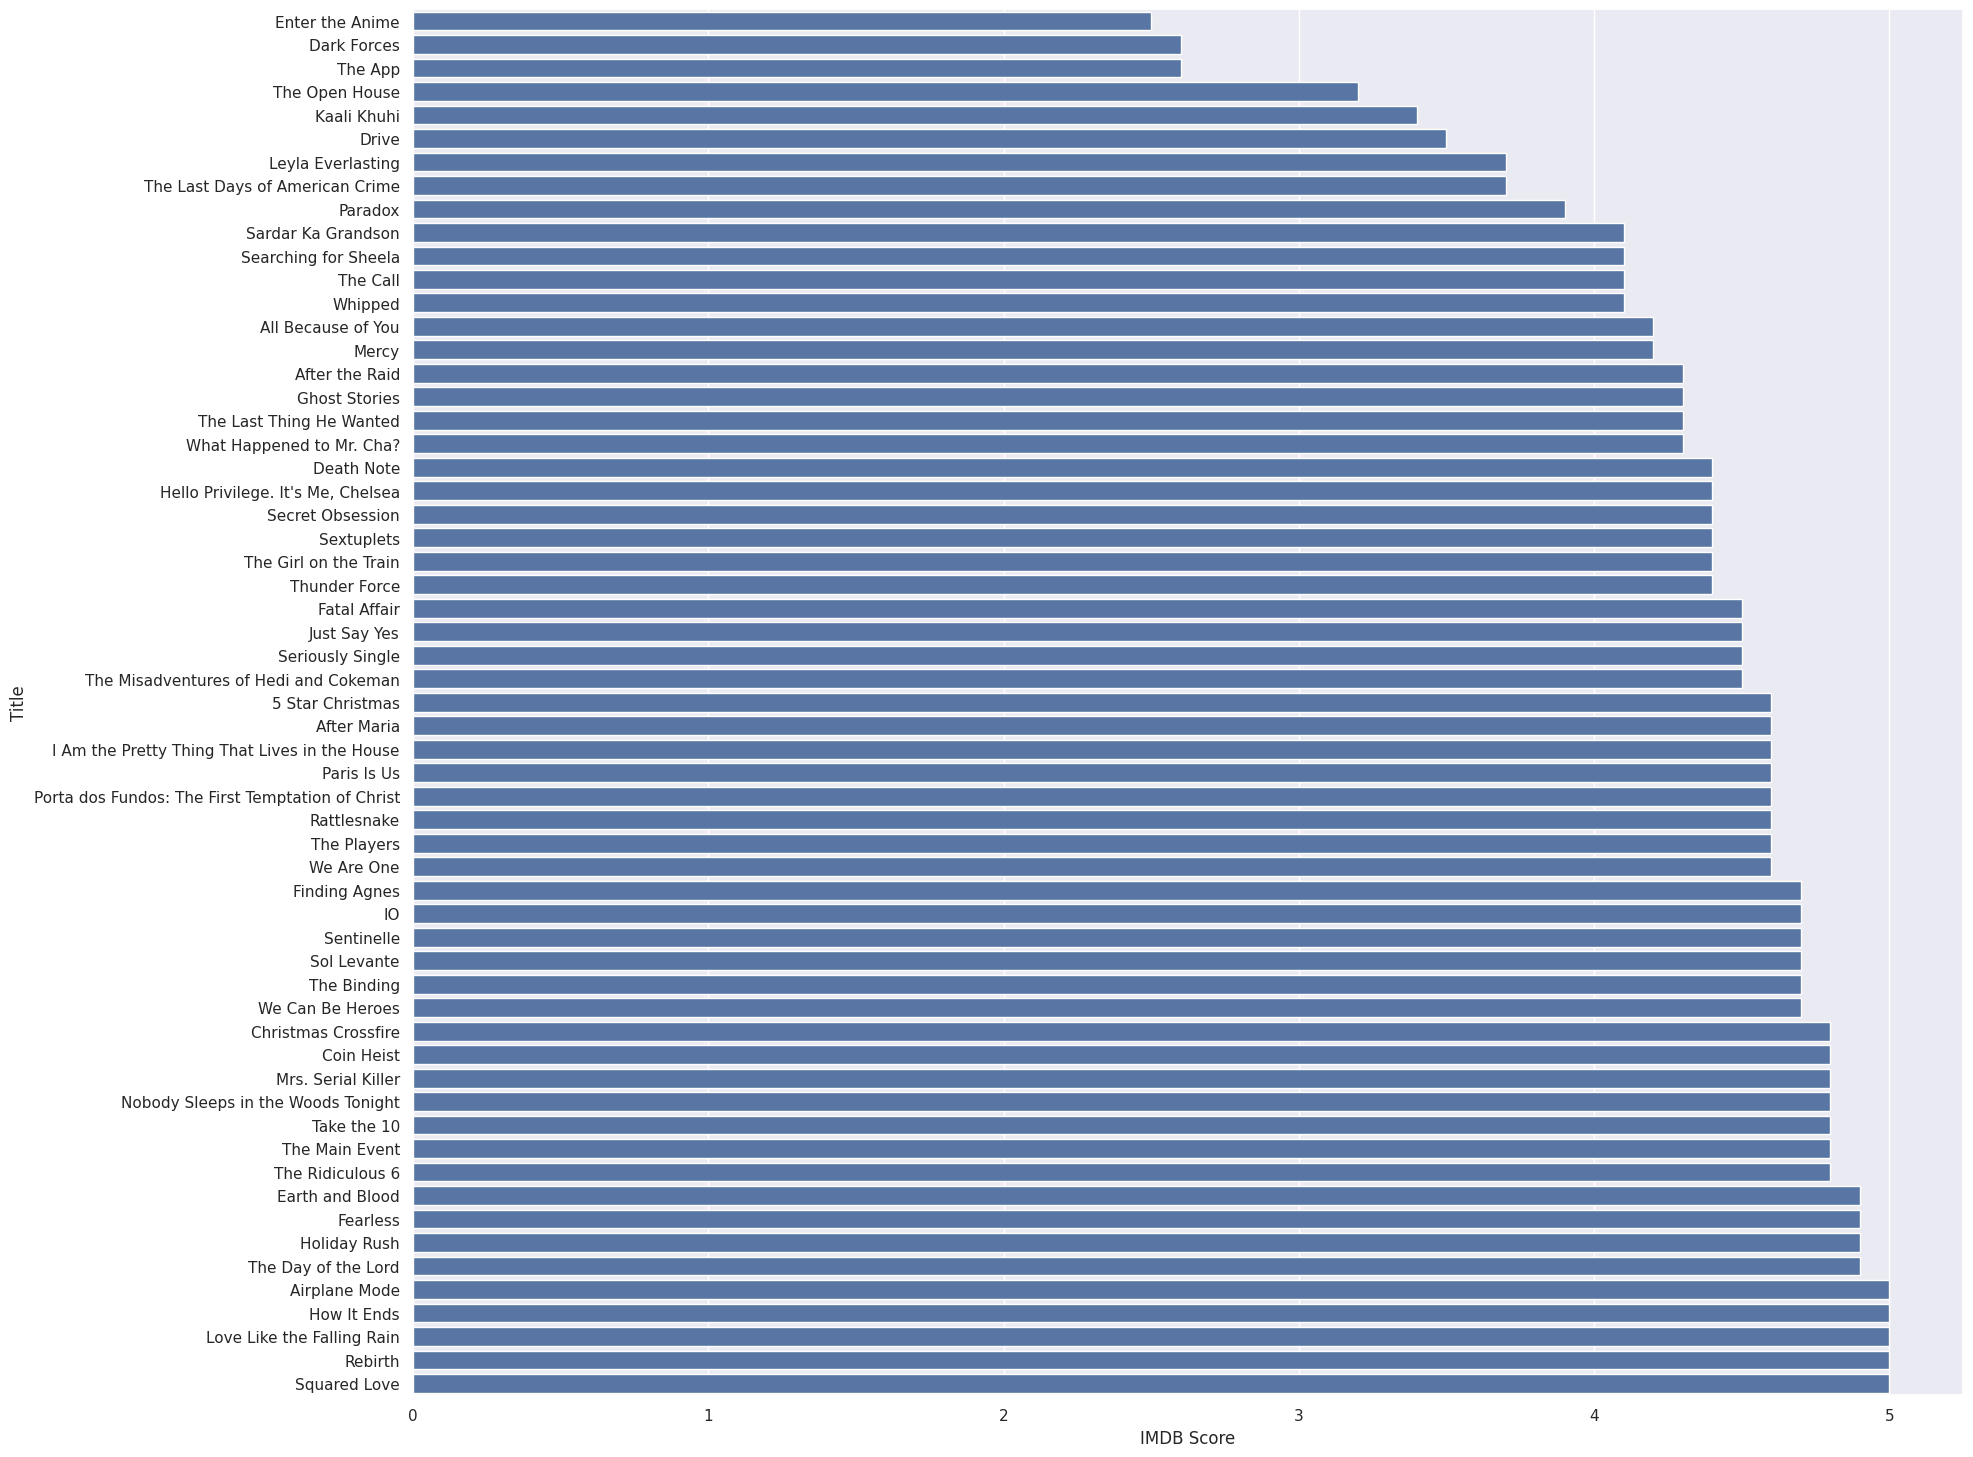

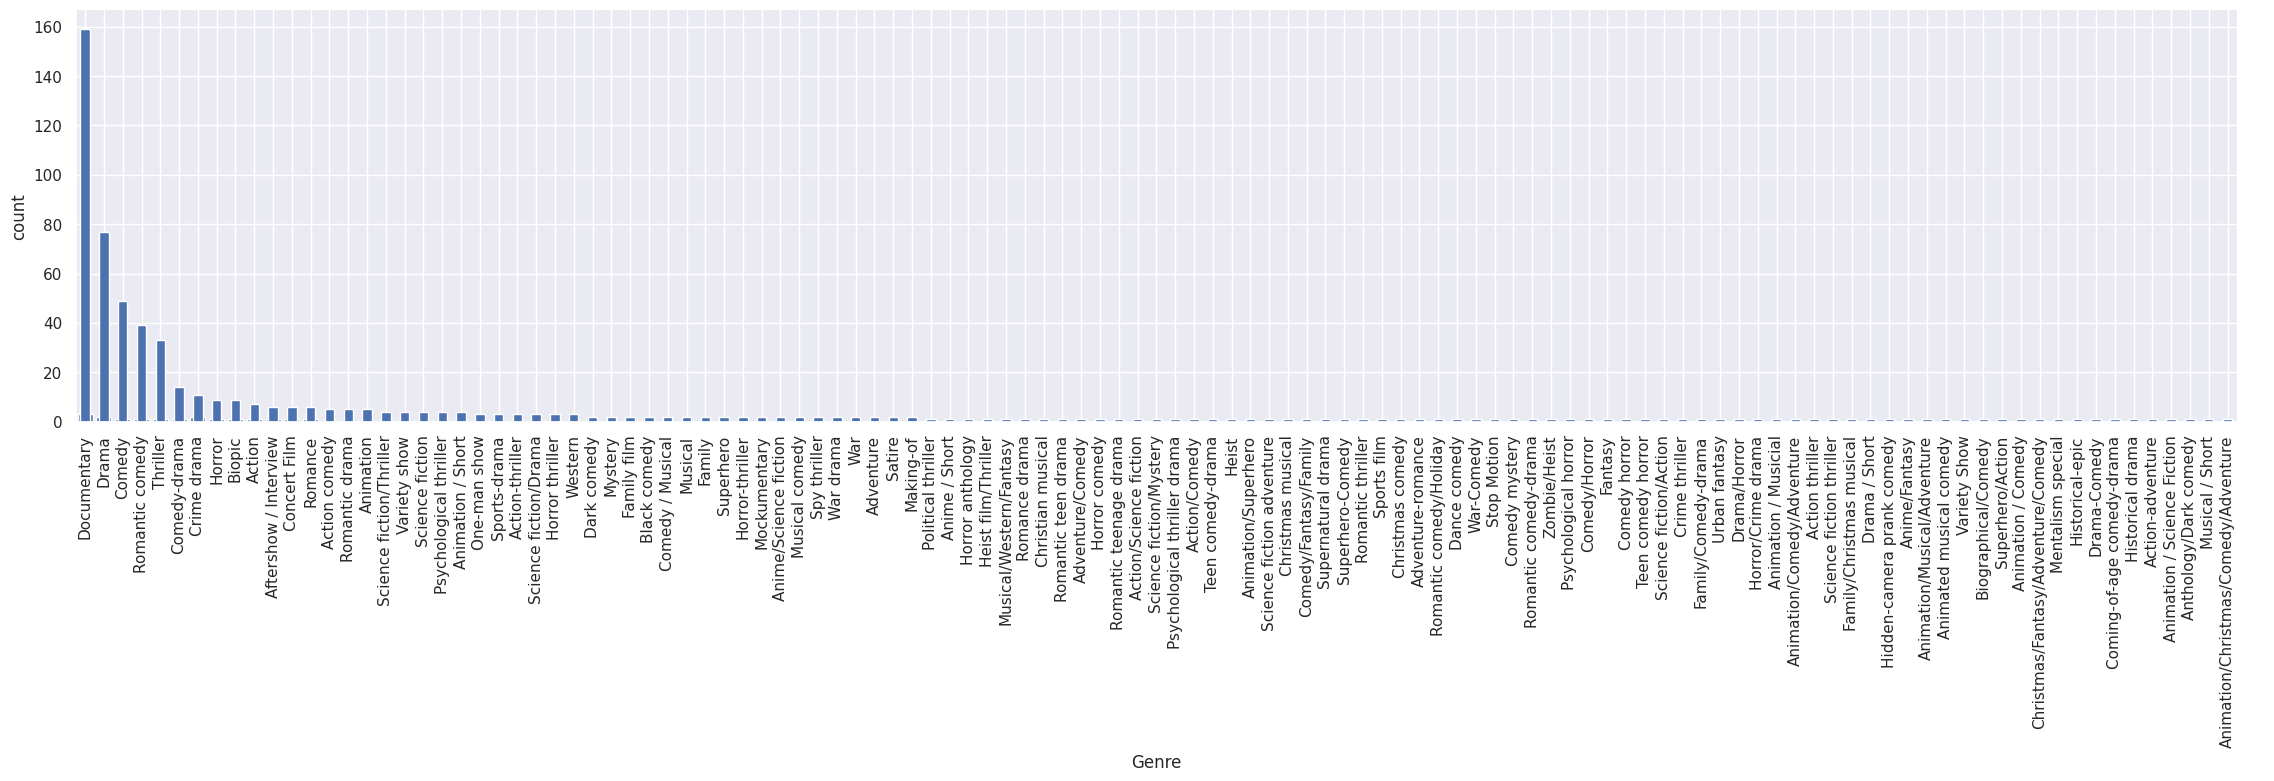

In [28]:
# Above are the movies which have ratings 8 or more

sns.set(rc={'figure.figsize':(20,18)})
score_5 = netflix[netflix['IMDB Score'] <= 5]
sns.barplot(x='IMDB Score', y='Title', data=score_5)

fig = px.bar(score_5, x='IMDB Score', y='Title', color='Genre')
fig.show()

# Above are the movies which have ratings less than 5

genre_low = netflix[netflix['IMDB Score'] <= 5][['Genre', 'Title', 'IMDB Score', 'Language']].sort_values('IMDB Score', ascending=True)

genre_low[:15]

sns.catplot(x="Genre", kind="count", data=genre_low[:17], aspect=50.7/11.2)

fig = px.bar(genre_low, x='Genre', y='IMDB Score', color='Title')
fig.show()

# Above are Top Genres & movies which have ratings lower than 5

netflix.Genre.value_counts().plot(kind='bar')

# Top genres fall in Documentary, Drama, Comedy, Romantic comedy, Thriller

<Axes: xlabel='Genre', ylabel='count'>

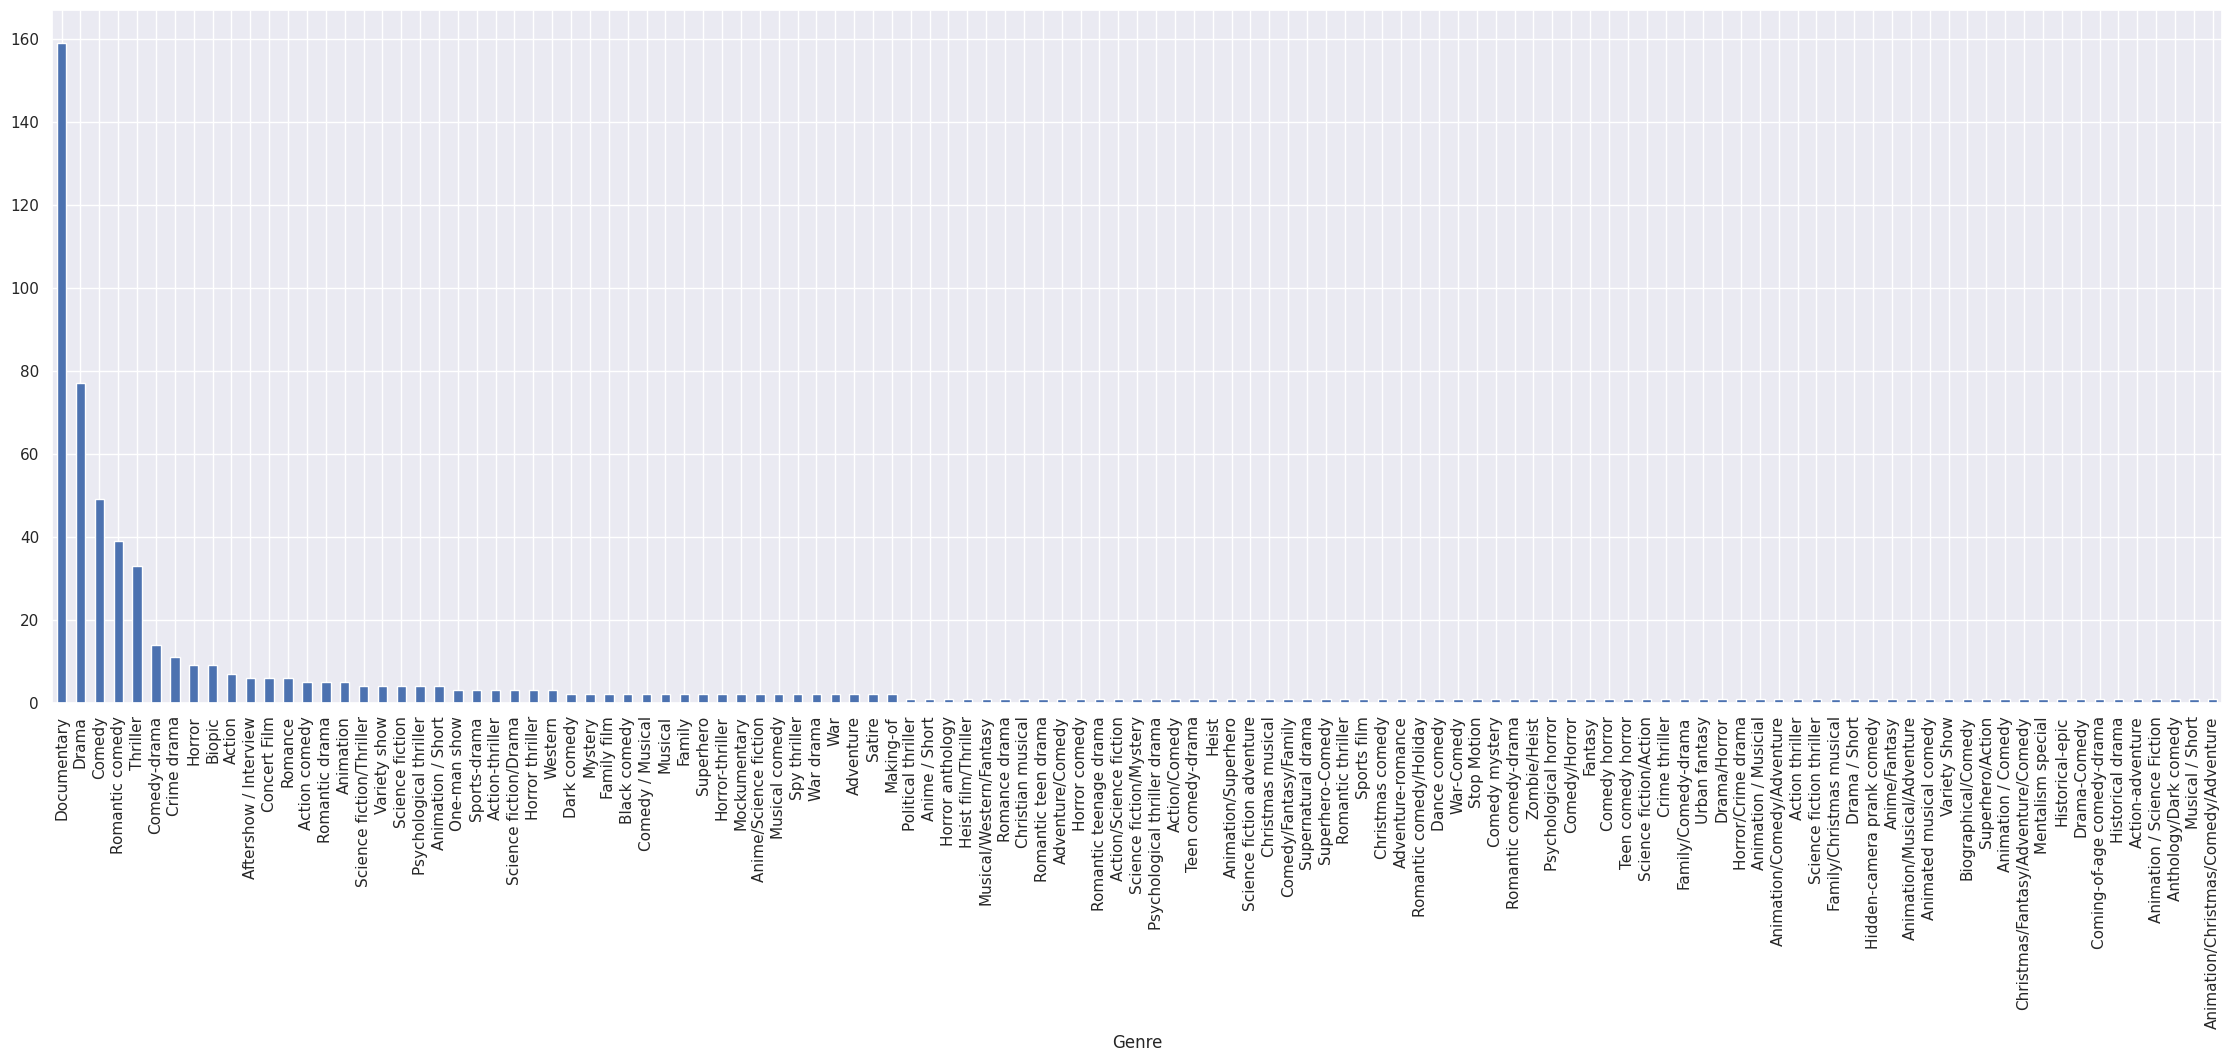

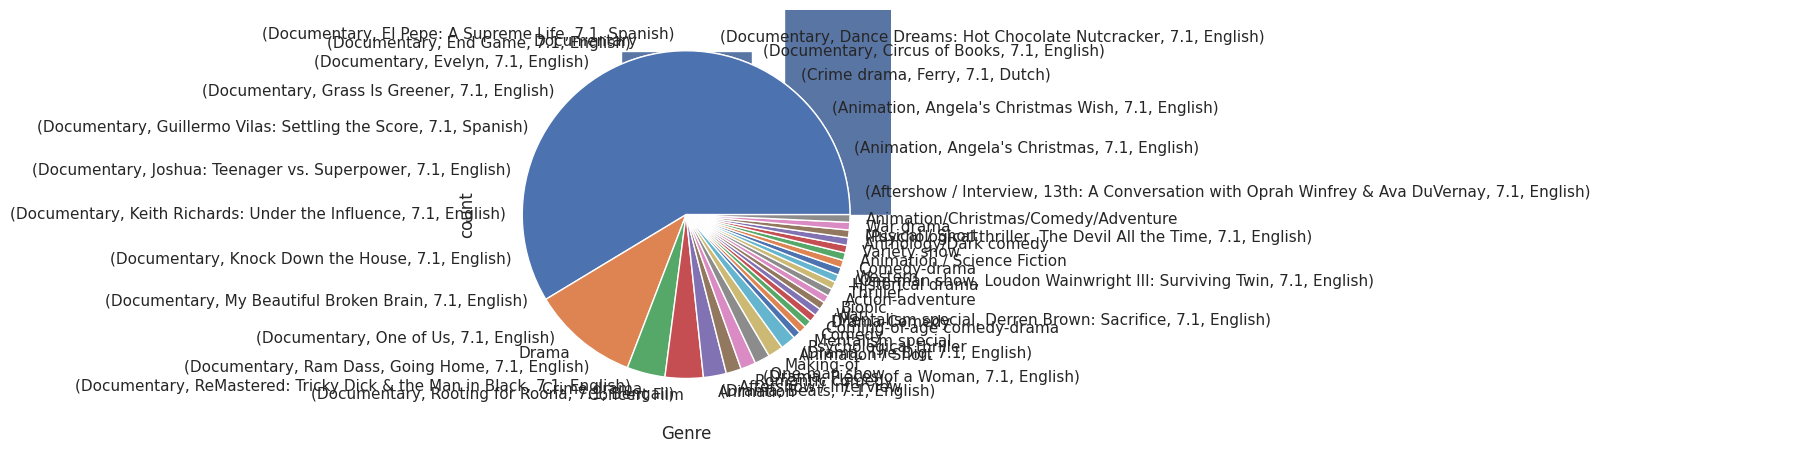

In [31]:
# Above are Top Genres & movies which have ratings lower than 5

plt.figure(figsize=(28,9))
netflix.Genre.value_counts().plot(kind='bar')

# Top genres fall in Documentary, Drama, Comedy, Romantic comedy, Thriller

genre_high = netflix[netflix['IMDB Score']>7][['Genre', 'Title', 'IMDB Score', 'Language']].sort_values('IMDB Score', ascending=True)

sns.catplot(x="Genre", kind="count", data=genre_high[:50], aspect=50.7/11.2)

fig = px.bar(genre_high, x='Genre', y='IMDB Score', color='Title')
fig.show()

# Above are the movies & Top genres where IMDB Score is greater than 7

# Move your cursor around the picture to get the details

genre_high[:25].value_counts().plot(kind='pie')
genre_high['Genre'].value_counts().plot(kind='pie')
